In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

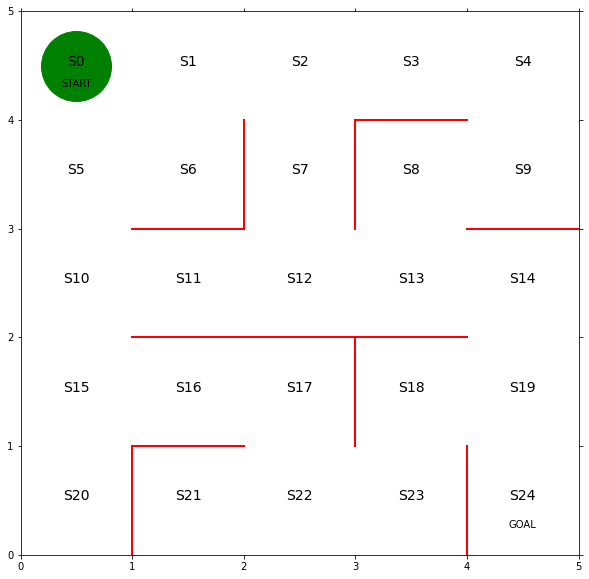

In [2]:
# 初期位置での迷路の様子

fig = plt.figure(figsize=(10, 10))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 2], [1, 1], color='red', linewidth=2)
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 4], [2, 2], color='red', linewidth=2)
plt.plot([4, 5], [3, 3], color='red', linewidth=2)
plt.plot([3, 3], [2, 1], color='red', linewidth=2)
plt.plot([3, 4], [4, 4], color='red', linewidth=2)
plt.plot([3, 3], [3, 4], color='red', linewidth=2)
plt.plot([1, 2], [3, 3], color='red', linewidth=2)
plt.plot([2, 2], [3, 4], color='red', linewidth=2)
plt.plot([4, 4], [0, 1], color='red', linewidth=2)

# 状態を示す文字S0～S24を描く
plt.text(0.5, 4.5, 'S0', size=14, ha='center')
plt.text(1.5, 4.5, 'S1', size=14, ha='center')
plt.text(2.5, 4.5, 'S2', size=14, ha='center')
plt.text(3.5, 4.5, 'S3', size=14, ha='center')
plt.text(4.5, 4.5, 'S4', size=14, ha='center')
plt.text(0.5, 3.5, 'S5', size=14, ha='center')
plt.text(1.5, 3.5, 'S6', size=14, ha='center')
plt.text(2.5, 3.5, 'S7', size=14, ha='center')
plt.text(3.5, 3.5, 'S8', size=14, ha='center')
plt.text(4.5, 3.5, 'S9', size=14, ha='center')
plt.text(0.5, 2.5, 'S10', size=14, ha='center')
plt.text(1.5, 2.5, 'S11', size=14, ha='center')
plt.text(2.5, 2.5, 'S12', size=14, ha='center')
plt.text(3.5, 2.5, 'S13', size=14, ha='center')
plt.text(4.5, 2.5, 'S14', size=14, ha='center')
plt.text(0.5, 1.5, 'S15', size=14, ha='center')
plt.text(1.5, 1.5, 'S16', size=14, ha='center')
plt.text(2.5, 1.5, 'S17', size=14, ha='center')
plt.text(3.5, 1.5, 'S18', size=14, ha='center')
plt.text(4.5, 1.5, 'S19', size=14, ha='center')
plt.text(0.5, 0.5, 'S20', size=14, ha='center')
plt.text(1.5, 0.5, 'S21', size=14, ha='center')
plt.text(2.5, 0.5, 'S22', size=14, ha='center')
plt.text(3.5, 0.5, 'S23', size=14, ha='center')
plt.text(4.5, 0.5, 'S24', size=14, ha='center')
plt.text(0.5, 4.3, 'START', ha='center')
plt.text(4.5, 0.25, 'GOAL', ha='center')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [4.5], marker="o", color='g', markersize=70)

In [4]:
# 行は状態0～24、列は移動方向で↑、→、↓、←を表す

theta_0 = np.array([[np.nan, 1, 1, np.nan], 
                    [np.nan, 1, 1, 1],
                    [np.nan, 1, 1, 1],
                    [np.nan, 1, np.nan, 1],
                    [np.nan, np.nan, 1, 1],
                    [1, 1, 1, np.nan],
                    [1, np.nan, np.nan, 1],
                    [1, np.nan, 1, np.nan],
                    [np.nan, 1, 1, np.nan],
                    [1, np.nan, np.nan, 1],
                    [1, 1, 1, np.nan],
                    [np.nan, 1, np.nan, 1],
                    [1, 1, np.nan, 1],
                    [1, 1, np.nan, 1],
                    [np.nan, np.nan, 1, 1],
                    [1, 1, 1, np.nan],
                    [np.nan, 1, np.nan, 1],
                    [np.nan, np.nan, 1, 1],
                    [np.nan, 1, 1, np.nan],
                    [1, np.nan, 1, 1],
                    [1, np.nan, np.nan, np.nan],
                    [np.nan, 1, np.nan, np.nan],
                    [1, 1, np.nan, 1],
                    [1, np.nan, np.nan, 1],
                    ])

In [5]:
def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''

    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])

    pi = np.nan_to_num(pi)

    return pi

# ランダム行動方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [6]:
# 初期の行動価値関数Qを設定

[a, b] = theta_0.shape
Q_0 = np.random.rand(a, b) * theta_0

In [7]:
# ε-greedy法を実装


def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]

    # 行動を決める
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]

    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action


def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]

    # 行動から次の状態を決める
    if next_direction == "up":
        s_next = s - 5
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 5
    elif next_direction == "left":
        s_next = s - 1

    return s_next

In [8]:
# Sarsaによる行動価値関数Qの更新


def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):

    if s_next == 24:  # ゴールした場合
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

    return Q

In [9]:
# Q学習による行動価値関数Qの更新


def Q_learning(s, a, r, s_next, Q, eta, gamma):

    if s_next == 24:  # ゴールした場合
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next,: ]) - Q[s, a])

    return Q

In [12]:
# Sarsaで迷路を解く関数の定義、状態と行動の履歴および更新したQを出力


def goal_maze_ret_s_a_Sarsa(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)  # 初期の行動
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト
    v = np.nanmax(Q, axis=1)
    list_Sarsa5 = [] #ステップ数ごとに記録するためのリスト

    while (1):  # ゴールするまでループ
        a = a_next  # 行動更新

        s_a_history[-1][1] = a
        # 現在の状態（つまり一番最後なのでindex=-1）に行動を代入

        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 次の状態を格納

        s_a_history.append([s_next, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        # 報酬を与え,　次の行動を求めます
        if s_next == 24:
            r = 1  # ゴールにたどり着いたなら報酬を与える
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 次の行動a_nextを求めます。

        # 価値関数を更新
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)
        new_v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
        list_Sarsa5.append(np.sum(np.abs(new_v - v)))
        v = new_v

        # 終了判定
        if s_next == 24:  # ゴール地点なら終了
            break
        else:
            s = s_next

    return [s_a_history, Q],list_Sarsa5

In [13]:
# Q学習で迷路を解く関数の定義、状態と行動の履歴および更新したQを出力


def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0 
    a = a_next = get_action(s, Q, epsilon, pi)  # 初期の行動
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト
    v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
    list_Q5 = [] #ステップ数ごとに記録するためのリスト

    while (1):  # ゴールするまでループ
        a = a_next  # 行動更新

        s_a_history[-1][1] = a
        # 現在の状態（つまり一番最後なのでindex=-1）に行動を代入

        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 次の状態を格納

        s_a_history.append([s_next, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        # 報酬を与え,　次の行動を求めます
        if s_next == 24:
            r = 1  # ゴールにたどり着いたなら報酬を与える
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 次の行動a_nextを求めます。

        # 価値関数を更新
        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)
        new_v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
        list_Q5.append(np.sum(np.abs(new_v - v)))
        v = new_v

        # 終了判定
        if s_next == 24:  # ゴール地点なら終了
            break
        else:
            s = s_next

    return [s_a_history, Q],list_Q5

In [14]:
# Sarsaで迷路を解く

eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # ε-greedy法の初期値
Q1 = Q_0.copy()
v = np.nanmax(Q1, axis=1)  # 状態ごとに価値の最大値を求める
is_continue = True
episode = 1
cnt_Sarsa = 0  #Step数をepisode終わるごとに0に戻るじゃなく，積み上げる

list_Sarsa = []

while is_continue:  # is_continueがFalseになるまで繰り返す
    print("エピソード:" + str(episode))

    # ε-greedyの値を少しずつ小さくする
    epsilon = epsilon / 2

    # Sarsaで迷路を解き、移動した履歴と更新したQを求める
    [s_a_history, Q1],list_Sarsa5 = goal_maze_ret_s_a_Sarsa(Q1, epsilon, eta, gamma, pi_0)
    list_Sarsa.extend(list_Sarsa5)

    #Stepごとの変化値を求めたいため，この部分はgoal_maze_ret_s_a_Sarsaにいれる
    # 状態価値の変化 
    #new_v = np.nanmax(Q1, axis=1)  # 状態ごとに価値の最大値を求める
    #print(np.sum(np.abs(new_v - v)))  # 状態価値の変化を出力
    #list_Sarsa5.append(np.sum(np.abs(new_v - v)))
    #v = new_v

    cnt_Sarsa += len(s_a_history) - 1
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")
    print("今までの総ステップ数は" + str(cnt_Sarsa) + "です")

    # 100エピソード繰り返す
    episode = episode + 1
    if episode > 100:
        break

エピソード:1
迷路を解くのにかかったステップ数は206です
今までの総ステップ数は206です
エピソード:2
迷路を解くのにかかったステップ数は148です
今までの総ステップ数は354です
エピソード:3
迷路を解くのにかかったステップ数は244です
今までの総ステップ数は598です
エピソード:4
迷路を解くのにかかったステップ数は144です
今までの総ステップ数は742です
エピソード:5
迷路を解くのにかかったステップ数は90です
今までの総ステップ数は832です
エピソード:6
迷路を解くのにかかったステップ数は48です
今までの総ステップ数は880です
エピソード:7
迷路を解くのにかかったステップ数は34です
今までの総ステップ数は914です
エピソード:8
迷路を解くのにかかったステップ数は38です
今までの総ステップ数は952です
エピソード:9
迷路を解くのにかかったステップ数は34です
今までの総ステップ数は986です
エピソード:10
迷路を解くのにかかったステップ数は30です
今までの総ステップ数は1016です
エピソード:11
迷路を解くのにかかったステップ数は40です
今までの総ステップ数は1056です
エピソード:12
迷路を解くのにかかったステップ数は44です
今までの総ステップ数は1100です
エピソード:13
迷路を解くのにかかったステップ数は38です
今までの総ステップ数は1138です
エピソード:14
迷路を解くのにかかったステップ数は38です
今までの総ステップ数は1176です
エピソード:15
迷路を解くのにかかったステップ数は38です
今までの総ステップ数は1214です
エピソード:16
迷路を解くのにかかったステップ数は36です
今までの総ステップ数は1250です
エピソード:17
迷路を解くのにかかったステップ数は38です
今までの総ステップ数は1288です
エピソード:18
迷路を解くのにかかったステップ数は40です
今までの総ステップ数は1328です
エピソード:19
迷路を解くのにかかったステップ数は34です
今までの総ステップ数は1362です
エピソード:20
迷路を解くのにかかったステップ数は38です
今までの総ステップ数は1400です
エピソード:21
迷路を解くのにかかったステップ数は34です
今まで

In [15]:
# Q学習で迷路を解く

eta = 0.1# 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # ε-greedy法の初期値
Q2 = Q_0.copy()
v = np.nanmax(Q2, axis=1)  # 状態ごとに価値の最大値を求める
is_continue = True
episode = 1
cnt_Q = 0

list_Q = []

while is_continue:  # is_continueがFalseになるまで繰り返す
    print("エピソード:" + str(episode))

    # ε-greedyの値を少しずつ小さくする
    epsilon = epsilon / 2

    # Q学習で迷路を解き、移動した履歴と更新したQを求める
    [s_a_history, Q2],list_Q5 = goal_maze_ret_s_a_Q(Q2, epsilon, eta, gamma, pi_0)
    list_Q.extend(list_Q5)

    # 状態価値の変化
    #new_v = np.nanmax(Q2, axis=1)  # 状態ごとに行動価値の最大値を求める
    #print(np.sum(np.abs(new_v - v)))  # 状態価値関数の変化を出力
    #list_Q5.append(np.sum(np.abs(new_v - v)))
    #v = new_v
    
    cnt_Q += len(s_a_history) - 1
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")
    print("今までの総ステップ数は" + str(cnt_Q) + "です")
    
    # 100エピソード繰り返す
    episode = episode + 1
    if episode > 100:
        break

エピソード:1
迷路を解くのにかかったステップ数は30です
今までの総ステップ数は30です
エピソード:2
迷路を解くのにかかったステップ数は34です
今までの総ステップ数は64です
エピソード:3
迷路を解くのにかかったステップ数は158です
今までの総ステップ数は222です
エピソード:4
迷路を解くのにかかったステップ数は538です
今までの総ステップ数は760です
エピソード:5
迷路を解くのにかかったステップ数は84です
今までの総ステップ数は844です
エピソード:6
迷路を解くのにかかったステップ数は18です
今までの総ステップ数は862です
エピソード:7
迷路を解くのにかかったステップ数は22です
今までの総ステップ数は884です
エピソード:8
迷路を解くのにかかったステップ数は20です
今までの総ステップ数は904です
エピソード:9
迷路を解くのにかかったステップ数は22です
今までの総ステップ数は926です
エピソード:10
迷路を解くのにかかったステップ数は24です
今までの総ステップ数は950です
エピソード:11
迷路を解くのにかかったステップ数は32です
今までの総ステップ数は982です
エピソード:12
迷路を解くのにかかったステップ数は24です
今までの総ステップ数は1006です
エピソード:13
迷路を解くのにかかったステップ数は22です
今までの総ステップ数は1028です
エピソード:14
迷路を解くのにかかったステップ数は28です
今までの総ステップ数は1056です
エピソード:15
迷路を解くのにかかったステップ数は24です
今までの総ステップ数は1080です
エピソード:16
迷路を解くのにかかったステップ数は20です
今までの総ステップ数は1100です
エピソード:17
迷路を解くのにかかったステップ数は26です
今までの総ステップ数は1126です
エピソード:18
迷路を解くのにかかったステップ数は32です
今までの総ステップ数は1158です
エピソード:19
迷路を解くのにかかったステップ数は28です
今までの総ステップ数は1186です
エピソード:20
迷路を解くのにかかったステップ数は30です
今までの総ステップ数は1216です
エピソード:21
迷路を解くのにかかったステップ数は26です
今までの総ステップ

In [16]:
#総ステップ数とリスト中データの数と一致するかを確認
print("Sarsa_step=" + str(cnt_Sarsa))
print("list_Sarsa_length=" + str(len(list_Sarsa)))

print("Q_step=" + str(cnt_Q))
print("list_Q_length=" + str(len(list_Q)))

Sarsa_step=3022
list_Sarsa_length=3022
Q_step=2560
list_Q_length=2560


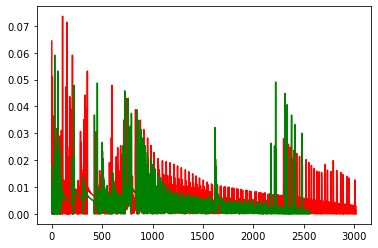

In [19]:
x_Sarsa = np.arange(0,cnt_Sarsa,1)
y_Sarsa = list_Sarsa
x_Q = np.arange(0,cnt_Q,1)
y_Q = list_Q

plt.plot(x_Sarsa,y_Sarsa,color="r")
plt.plot(x_Q,y_Q,color='g')

In [459]:
#エクセルファイルに書き込み
import openpyxl

wb = openpyxl.load_workbook('C:/Users/zhang/SarsaVSQlearning.xlsx')
ws = wb['Sheet1']


#配列ループ
for i in range(0,len(x_Sarsa)):

    #A列にリストを書き込み
    ws.cell(i+1,28,value = x_Sarsa[i])

    #B列にリストを書き込み
    ws.cell(i+1,29,value = y_Sarsa[i])

#別名で保存
wb.save('C:/Users/zhang/SarsaVSQlearning.xlsx')

In [460]:
import openpyxl

wb = openpyxl.load_workbook('C:/Users/zhang/SarsaVSQlearning.xlsx')
ws = wb['Sheet2']


#配列ループ
for i in range(0,len(x_Q)):

    #A列にリストを書き込み
    ws.cell(i+1,28,value = x_Q[i])

    #B列にリストを書き込み
    ws.cell(i+1,29,value = y_Q[i])

#別名で保存
wb.save('C:/Users/zhang/SarsaVSQlearning.xlsx')